In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
train = pd.read_csv("train2.csv")
test = pd.read_csv("test2.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

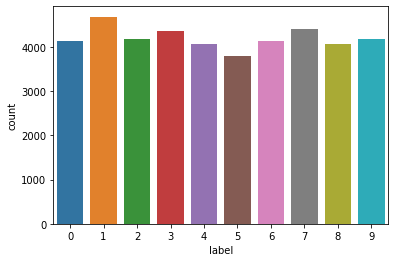

In [4]:
sns.countplot(x='label', data=train);

In [5]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [7]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

Using TensorFlow backend.


(42000, 10)

In [8]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

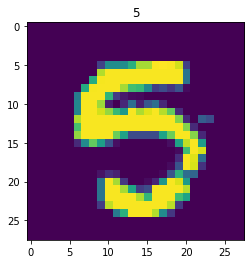

In [10]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

In [11]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [12]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_set = df.copy()
target = tree_set.iloc[:,0]
tree_set_X = tree_set.iloc[:,1:] 

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(tree_set_X, target)
clf.score(tree_set_X, target)

NameError: name 'df' is not defined

In [13]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 144s 4ms/step - loss: 0.4887 - accuracy: 0.8468 - val_loss: 0.6940 - val_accuracy: 0.8188
Epoch 2/10
37800/37800 [==============================] - 138s 4ms/step - loss: 0.1349 - accuracy: 0.9610 - val_loss: 0.0763 - val_accuracy: 0.9776
Epoch 3/10
37800/37800 [==============================] - 138s 4ms/step - loss: 0.0911 - accuracy: 0.9744 - val_loss: 0.0541 - val_accuracy: 0.9857
Epoch 4/10
37800/37800 [==============================] - 138s 4ms/step - loss: 0.0760 - accuracy: 0.9791 - val_loss: 0.0640 - val_accuracy: 0.9840
Epoch 5/10
37800/37800 [==============================] - 138s 4ms/step - loss: 0.0629 - accuracy: 0.9824 - val_loss: 0.0658 - val_accuracy: 0.9795
Epoch 6/10
37800/37800 [==============================] - 142s 4ms/step - loss: 0.0566 - accuracy: 0.9845 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 7/10
37800/37800 [==============================] - 139s 

In [14]:
# SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 173s 5ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0345 - val_accuracy: 0.9929
Epoch 2/30
37800/37800 [==============================] - 170s 5ms/step - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.0337 - val_accuracy: 0.9929
Epoch 3/30
37800/37800 [==============================] - 172s 5ms/step - loss: 0.0208 - accuracy: 0.9943 - val_loss: 0.0327 - val_accuracy: 0.9929
Epoch 4/30
37800/37800 [==============================] - 1599s 42ms/step - loss: 0.0188 - accuracy: 0.9949 - val_loss: 0.0327 - val_accuracy: 0.9938
Epoch 5/30
37800/37800 [==============================] - 1359s 36ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.0330 - val_accuracy: 0.9926
Epoch 6/30
37800/37800 [==============================] - 322s 9ms/step - loss: 0.0178 - accuracy: 0.9951 - val_loss: 0.0327 - val_accuracy: 0.9929
Epoch 7/30
37800/37800 [==============================] - 1

In [16]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('dig_submission.csv', index=False)

In [ ]:
sriram2397. “Digit-Recognizer-Kaggle/digit_recognizer.Ipynb at Master · SRIRAM2397/Digit-Recognizer-Kaggle.” GitHub. Accessed February 6, 2022. https://github.com/sriram2397/digit-recognizer-kaggle/blob/master/Digit_Recognizer.ipynb. 